In [1]:
import pandas as pd

In [2]:
readDf = pd.read_csv("NS0039.centrifuge.output", sep="\t", names=["readID","seqID","taxID", "score","2ndBestScore","hitLength","queryLength", "numMatches"])

In [3]:
nameDf = pd.read_csv("names.dmp", sep="|", names=["tax_id", "name_txt", "unique_name", "name_class", "blank"], skipinitialspace=True)


In [4]:
nodeDF = pd.read_csv("nodes.dmp", sep="|", names=["tax_id", "parent_tax_id", "rank", "embl code", "division_id", "inherited_div_flag","genetic_code_id","inherited_gc_flag", "mitochondrial_genetic_code_id", "inherited_mgc_flag", "genbank_hidden_flag", "hidden_subtree_root_flag", "comments", "plastid_genetic_code_id", "inherited_pgc_flag", "specified_species", "hydrogenosome_genetic_code", "inherited_hgc_flag", "blank"], skipinitialspace=True)

C:\Users\WJang\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
readIndex = dict()

In [6]:
print(readIndex)

{}


In [7]:
for index, row in readDf.iterrows():
    if row["readID"] not in readIndex:
        readIndex[row["readID"]] = set()
    readIndex[row["readID"]].add(row["taxID"])

In [8]:
tbRemoved = set()
for entry in readIndex:
    if len(readIndex[entry]) <=1:
        tbRemoved.add(entry)
for entry in tbRemoved:
    readIndex.pop(entry)

In [8]:
print(len(readIndex))

176279


In [9]:
print(nameDf.head(50))

    tax_id                                           name_txt  \
0        1                                            \tall\t   
1        1                                           \troot\t   
2        2                                       \tbacteria\t   
3        2                                       \tBacteria\t   
4        2                                     \teubacteria\t   
5        2                                         \tMonera\t   
6        2                      \tnot Bacteria Haeckel 1894\t   
7        2                                    \tProcaryotae\t   
8        2                                    \tProkaryotae\t   
9        2                                     \tProkaryota\t   
10       2                                     \tprokaryote\t   
11       2                                    \tprokaryotes\t   
12       6                                   \tAzorhizobium\t   
13       6  \tAzorhizobium Dreyfus et al. 1988 emend. Lang...   
14       7               

In [10]:
print(nodeDF.head(10))

   tax_id  parent_tax_id              rank embl code  division_id  \
0       1              1       \tno rank\t      \t\t            8   
1       2         131567  \tsuperkingdom\t      \t\t            0   
2       6         335928         \tgenus\t      \t\t            0   
3       7              6       \tspecies\t    \tAC\t            0   
4       9          32199       \tspecies\t    \tBA\t            0   
5      10        1706371         \tgenus\t      \t\t            0   
6      11           1707       \tspecies\t    \tCG\t            0   
7      13         203488         \tgenus\t      \t\t            0   
8      14             13       \tspecies\t    \tDT\t            0   
9      16          32011         \tgenus\t      \t\t            0   

   inherited_div_flag  genetic_code_id  inherited_gc_flag  \
0                   0                1                  0   
1                   0               11                  0   
2                   1               11                  1

In [11]:
taxonIndex = {}
for index, row in nameDf.iterrows():
    if row["tax_id"] not in taxonIndex:
        taxonIndex[row["tax_id"]] = row["name_txt"].strip()
        

In [12]:
nodeIndex = {}
for index, row in nodeDF.iterrows():
    if row["tax_id"] not in nodeIndex and row["rank"].strip() == "species":
        nodeIndex[row["tax_id"]] = row["parent_tax_id"]

In [15]:
sReads, mReads = 0, 0
for read in readIndex:
    if len(readIndex[read]) > 1:
        mReads += 1
    else:
        sReads += 1
multipleReadsPercentDf = pd.DataFrame.from_dict({"single taxon reads" : [sReads], "multiple taxon reads" : [mReads]})


In [16]:
print(multipleReadsPercentDf)

   single taxon reads  multiple taxon reads
0              138403                 37876


In [17]:
import matplotlib.pyplot as plt

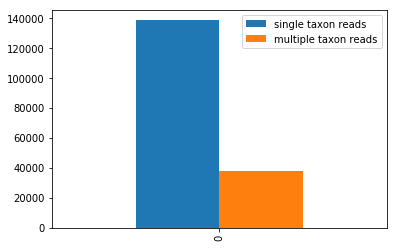

In [18]:
multipleReadsPercentDf.plot(kind="bar")


In [45]:
taxonReadMapSize = {}
for read in readIndex:
    if len(readIndex[read]) not in taxonReadMapSize:
        taxonReadMapSize[len(readIndex[read])] = [0]
    taxonReadMapSize[len(readIndex[read])][0] += 1
taxonMapSizes = pd.DataFrame.from_dict(taxonReadMapSize)
print(taxonMapSizes.index.values)
        

[0]


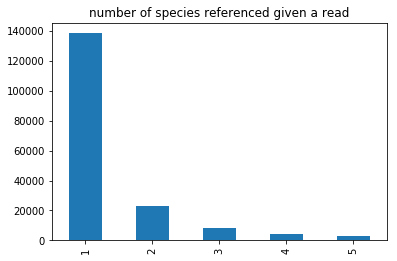

In [79]:
import matplotlib.pyplot as plt
plot = taxonMapSizes.transpose().sort_values(0, ascending=False).plot(kind="bar", title="number of species referenced given a read", legend=False
                                                                     )
fig = plot.get_figure()
fig.savefig('mapping_distribution.png')

In [54]:
genusAnalysis = {}
for read in readIndex:
    if(len(readIndex[read]) == 1):
        continue
    genusSet = set()
    for taxID in readIndex[read]:
        if taxID not in nodeIndex: 
            continue
        genusSet.add(nodeIndex[taxID])
    if len(genusSet) not in genusAnalysis:
        genusAnalysis[len(genusSet)] = [0]
    genusAnalysis[len(genusSet)][0] += 1
        

In [71]:
print(genusAnalysis)

{1: [23066], 0: [4151], 2: [8254], 3: [1763], 4: [566], 5: [76]}


In [72]:
genusDf = pd.DataFrame.from_dict(genusAnalysis).transpose()

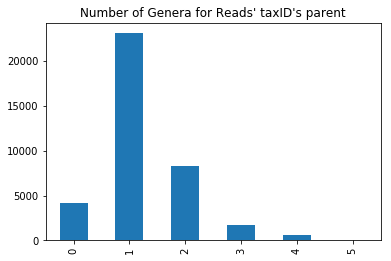

In [78]:
plot = genusDf.sort_index().plot(kind="bar", title="Number of Genera for Reads' taxID's parent", legend=False)
fig = plot.get_figure()
fig.savefig('genus_mapping_distribution.png')